# 데이터 분석 라이브러리 복습하기! - 월드컵 데이터

Pandas와 Matplotlib을 실전 데이터에 활용하기

### 학습 목표
- 월드컵 데이터와 월드컵 매치 데이터를 활용해서 지금까지 배운 Pandas와 Matplotlib을 응용해봅니다.
- 실전 데이터를 사용할 때 활용하기 편리하며 개발 과정에서 사용가능한 형태로 전처리하는 방법을 배워봅니다.
- 데이터를 한 눈에 쉽게 이해하고 분석할 수 있도록 하는 필수 작업인 시각화를 연습해봅니다.

---

# Contents
**1. [월드컵 데이터](#1.-월드컵-데이터)**    
1-1. [데이터 분석 준비하기](#1-1.-데이터-분석-준비하기)      
1-2. [전체 데이터 한눈에보기](#1-2.-전체-데이터-한눈에보기)      
1-3. [데이터 전처리](#1-3.-데이터-전처리)      
1-4. [그래프로 확실하게 확인하기](#1-4.-그래프로-확실하게-확인하기)      

**2. [월드컵 매치 데이터](#2.-월드컵-매치-데이터)**     
2-1. [데이터 분석 준비하기](#2-1.-데이터-분석-준비하기)    
2-2. [꼭 필요한 데이터 전처리](#2-2.-꼭-필요한--데이터-전처리)      
2-3. [더 해보면 좋을 전처리들](#2-3.-더-해보면-좋을-전처리들)    
2-4. [Datetime 데이터 다뤄보기](#2-4.-Datetime-데이터-다뤄보기)    
2-5. [나라 이름 전처리하기](#2-5.-나라-이름-전처리하기)   
2-6. [국가별 득점 수 구하기](#2-6.-국가별-득점-수-구하기)

---

# 1. 월드컵 데이터 

## 1-1. 데이터 분석 준비하기

본격적으로 데이터를 분석하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module을 import 해 봅니다.   
지금까지 배웠던 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

### (1) Import Modules

In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### (2) Load Dataset

그 다음, 가장 중요한 데이터셋을 가져와 봅니다. 데이터셋은 아래 출처에서 다운로드 할 수 있습니다.    
- 출처 : https://www.kaggle.com/abecklas/fifa-world-cup 



`Download`를 통해 데이터를 저장하면 `fifa-world-cup.zip` 파일이 저장됩니다.     
압축파일을 풀면 얻을 수 있는 `fifa-world-cup` 폴더를 현재 주피터 노트북 파일과 같은 위치에 저장해주세요.   
폴더 내에는 `WorldCups.csv`, `WorldCupMatches.csv`, `WorldCupPlayers.csv` 이름의 csv 파일들이 있습니다.

pandas를 활용해 데이터를 가져와보도록 하겠습니다.

In [2]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
worldcup = pd.read_csv("fifa-world-cup/WorldCups.csv")

# 데이터프레임의 크기를 확인합니다.
print(worldcup.shape)

worldcup

(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 개최 연도 | 1930
Country | 개최 국가 | Uruguay
Winner | 우승 국가 | Uruguay
Runners-Up | 준우승 국가 | Argentina
Third | 3위 국가 | USA
Fourth | 4위 국가 | Yugoslavia
GoalsScored | 총 득점 수 | 70
QualifiedTeams | 참가 국가 수 | 13
MatchesPlayed | 총 경기 수 | 18
Attendance | 총 관중 | 590549

## 1-2. 전체 데이터 한눈에보기
- 데이터프레임의 각 열에 대한 정보와, 비어있는 데이터의 개수를 간단히 확인합니다.

In [3]:
# info 확인하기
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


- `object`는 문자열 데이터를, `int64`는 정수형 데이터를 나타냅니다. 
- 정수형이어야 할 `Attendence` 컬럼이 `object`로 저장되어 있으므로, 이를 처리해줘야 할 것으로 보입니다.

## 1-3. 데이터 전처리
- 먼저 처리가 필요한 데이터나 추가해주고 싶은 데이터를 다뤄보겠습니다. 
- 데이터 전처리는 데이터를 이해하며, 내 입맛대로 분석하기 위해 필수적으로 거쳐야 할 사전 작업입니다.



### (1) `Attendance` : object → float 으로 변환
- 하나의 컬럼의 값들을 일괄적으로 변환해주기 위해 함수를 적용할 수 있는 `astype` 함수를 사용합니다.

In [4]:
worldcup["Attendance"] = worldcup["Attendance"].astype("int64")

ValueError: invalid literal for int() with base 10: '590.549'

- '590.549' 를 `int`로 만들 수 없다는 내용의 에러가 발생합니다.


- 이는 `.` 문자로 인해 일어난 것으로, `.`을 없애주도록 하겠습니다.

#### 1. 사용할 함수 `attendance_to_float` 정의
- 간단하게 `replace`를 활용해서 "."을 없애줍니다.

In [5]:
def attendance_to_float(i):
    i = i.replace(".", "")
    return i

#### 2. 함수 적용결과 간단하게 확인
- 단 하나의 문자열로 먼저 함수의 결과를 확인합니다.

In [6]:
attendance_to_float("3.386.810")

'3386810'

#### 3. 데이터프레임에 `apply` 함수로 적용
- 함수 적용 결과에 문제가 없다면, 전체 데이터프레임에 적용시켜줍니다.

In [7]:
worldcup["Attendance"] = worldcup["Attendance"].apply(attendance_to_float)
worldcup["Attendance"] = worldcup["Attendance"].astype("int64")
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


모두 적용되었습니다. 다시 한 번 데이셋을 살펴볼까요?

In [8]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


- `Attendance` 컬럼이 `int64`의 정수형 데이터로 잘 변환된 것을 볼 수 있습니다!

### (2) 경기 당 득점 수 확인하기
- 원본 데이터에는 한 월드컵에서 득점된 전체 골의 수 `GoalsScored`와 진행된 전체 매치 수 `MatchesPlayed`가 있습니다.
- 우리는 이 둘을 활용하여 한 매치 당 득점된 골의 수의 평균을 구해보겠습니다.


- `Goals_per_Match` = `GoalsScored` / `MatchesPlayed`

In [9]:
worldcup["Goals_per_Match"] = worldcup["GoalsScored"] / worldcup["MatchesPlayed"]
worldcup[["GoalsScored", "MatchesPlayed", "Goals_per_Match"]]

,GoalsScored,MatchesPlayed,Goals_per_Match
0,70,18,3.888889
1,70,17,4.117647
2,84,18,4.666667
3,88,22,4.000000
4,140,26,5.384615
5,126,35,3.600000
6,89,32,2.781250
7,89,32,2.781250
8,95,32,2.968750
9,97,38,2.552632


## 1-4. 그래프로 확실하게 확인하기
- 이번엔 데이터를 그래프로 옮겨서 확인해보겠습니다. 
- 시각화 작업은 데이터를 더 빠르고 확실하게 이해하는데에 필수적입니다.


### (1) 전체 관중수, 경기 수 그래프 그려보기
- plt 플롯의 선과 마커는 원하는대로 커스터마이징이 가능합니다.   
 (https://kongdols-room.tistory.com/82 참고)

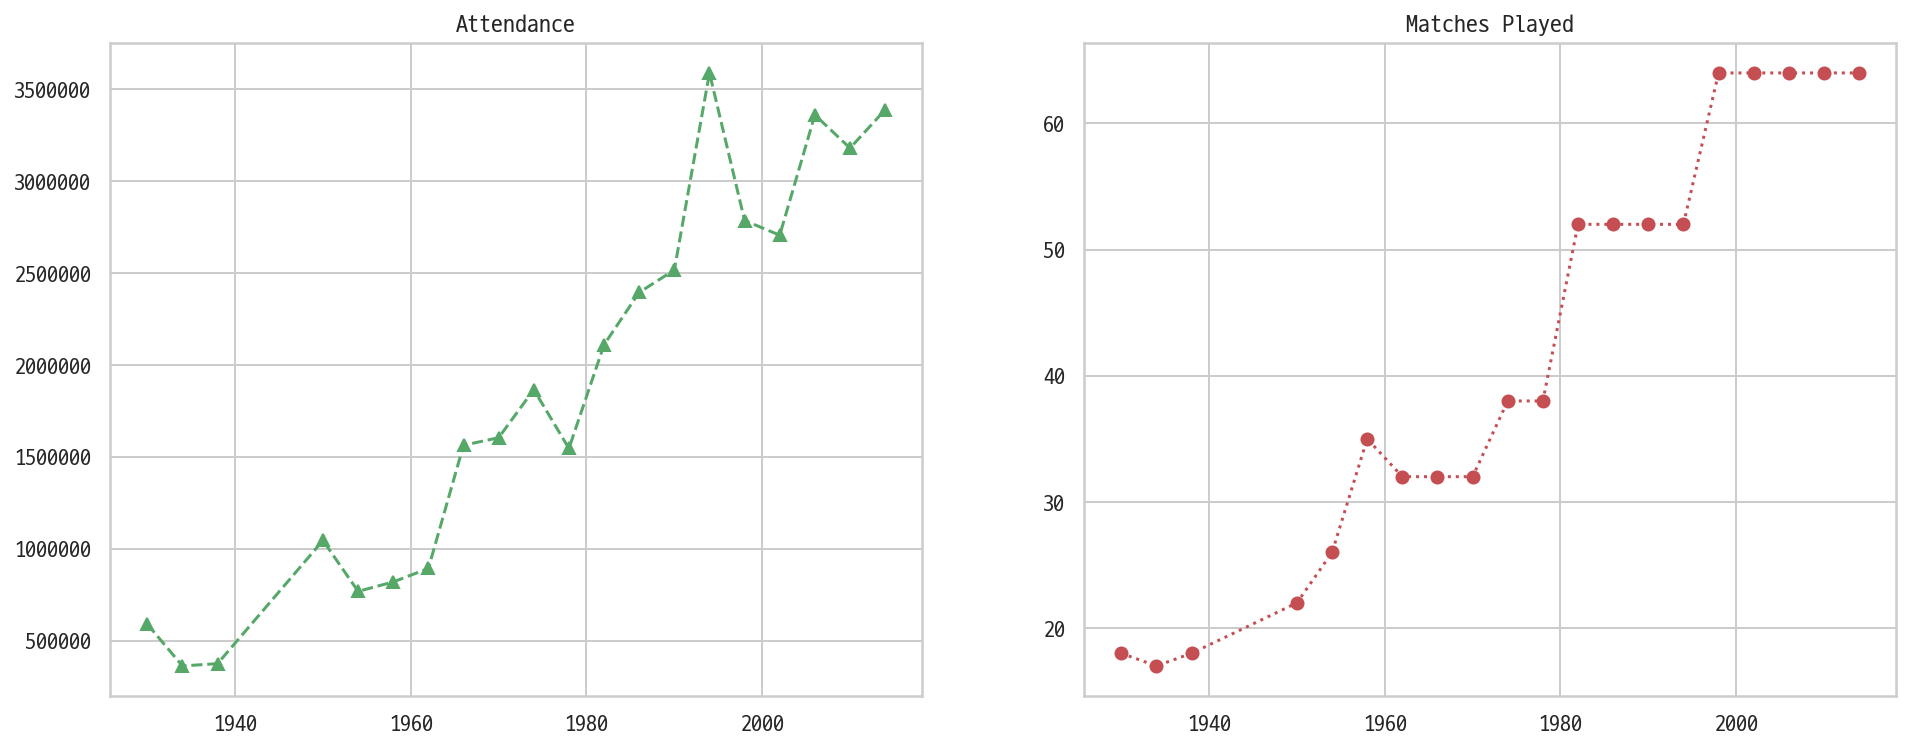

In [10]:
# 그래프 사이즈 설정
plt.figure(figsize=(16, 6))


# 한 번에 두 개 이상의 그래프를 그리고 싶다면 subplot을 활용하면 됩니다.
# 그리고자 하는 그래프들을 행(row), 열(column) 로 배열할 때,
# subplot(row, column, order) 순서대로 숫자를 입력하면 됩니다.

plt.subplot(121)
plt.plot("Year", "Attendance", "g^--", data=worldcup)
plt.title("Attendance")
plt.subplot(122)
plt.plot("Year", "MatchesPlayed", "ro:", data=worldcup)
plt.title("Matches Played")

plt.show()

- 연도가 지남에 따라 전체 관중의 수와 경기 수가 늘어난 것으로 보입니다.

### (2) 전체 득점 수, 전체 매치 수, 매치 당 골 수 그래프 그려보기

- 이번에는 득점에 관련된 그래프들을 확인해보겠습니다.

- `GoalsScored`, `MatchesPlayed`, `Goals_per_Match`는 모두 년도별로 비교하면 좋은 데이터이기 때문에, 한 그래프 안에 모두 표현해보겠습니다.

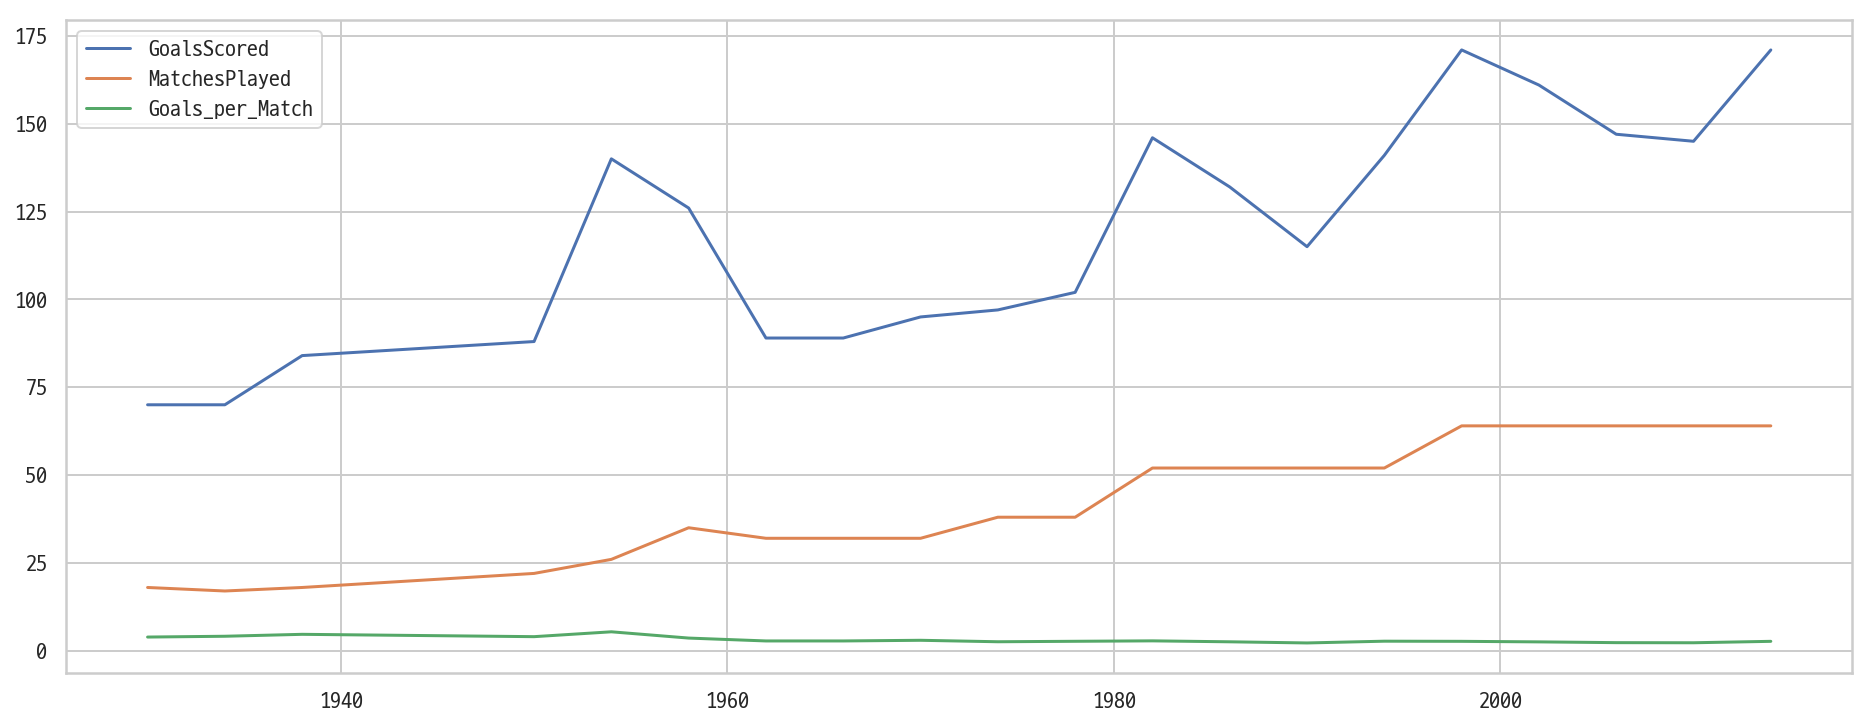

In [11]:
plt.figure(figsize=(16, 6))

plt.plot("Year", "GoalsScored", data=worldcup)
plt.plot("Year", "MatchesPlayed", data=worldcup)
plt.plot("Year", "Goals_per_Match", data=worldcup)

# label을 보고싶다면
plt.legend()
plt.show()

- 하지만 스케일이 다르기 때문에 한 그래프 안에 모두를 표현하는 것이 부적절할 수도 있습니다.
- 세 그래프를 세로로 나열해보겠습니다.

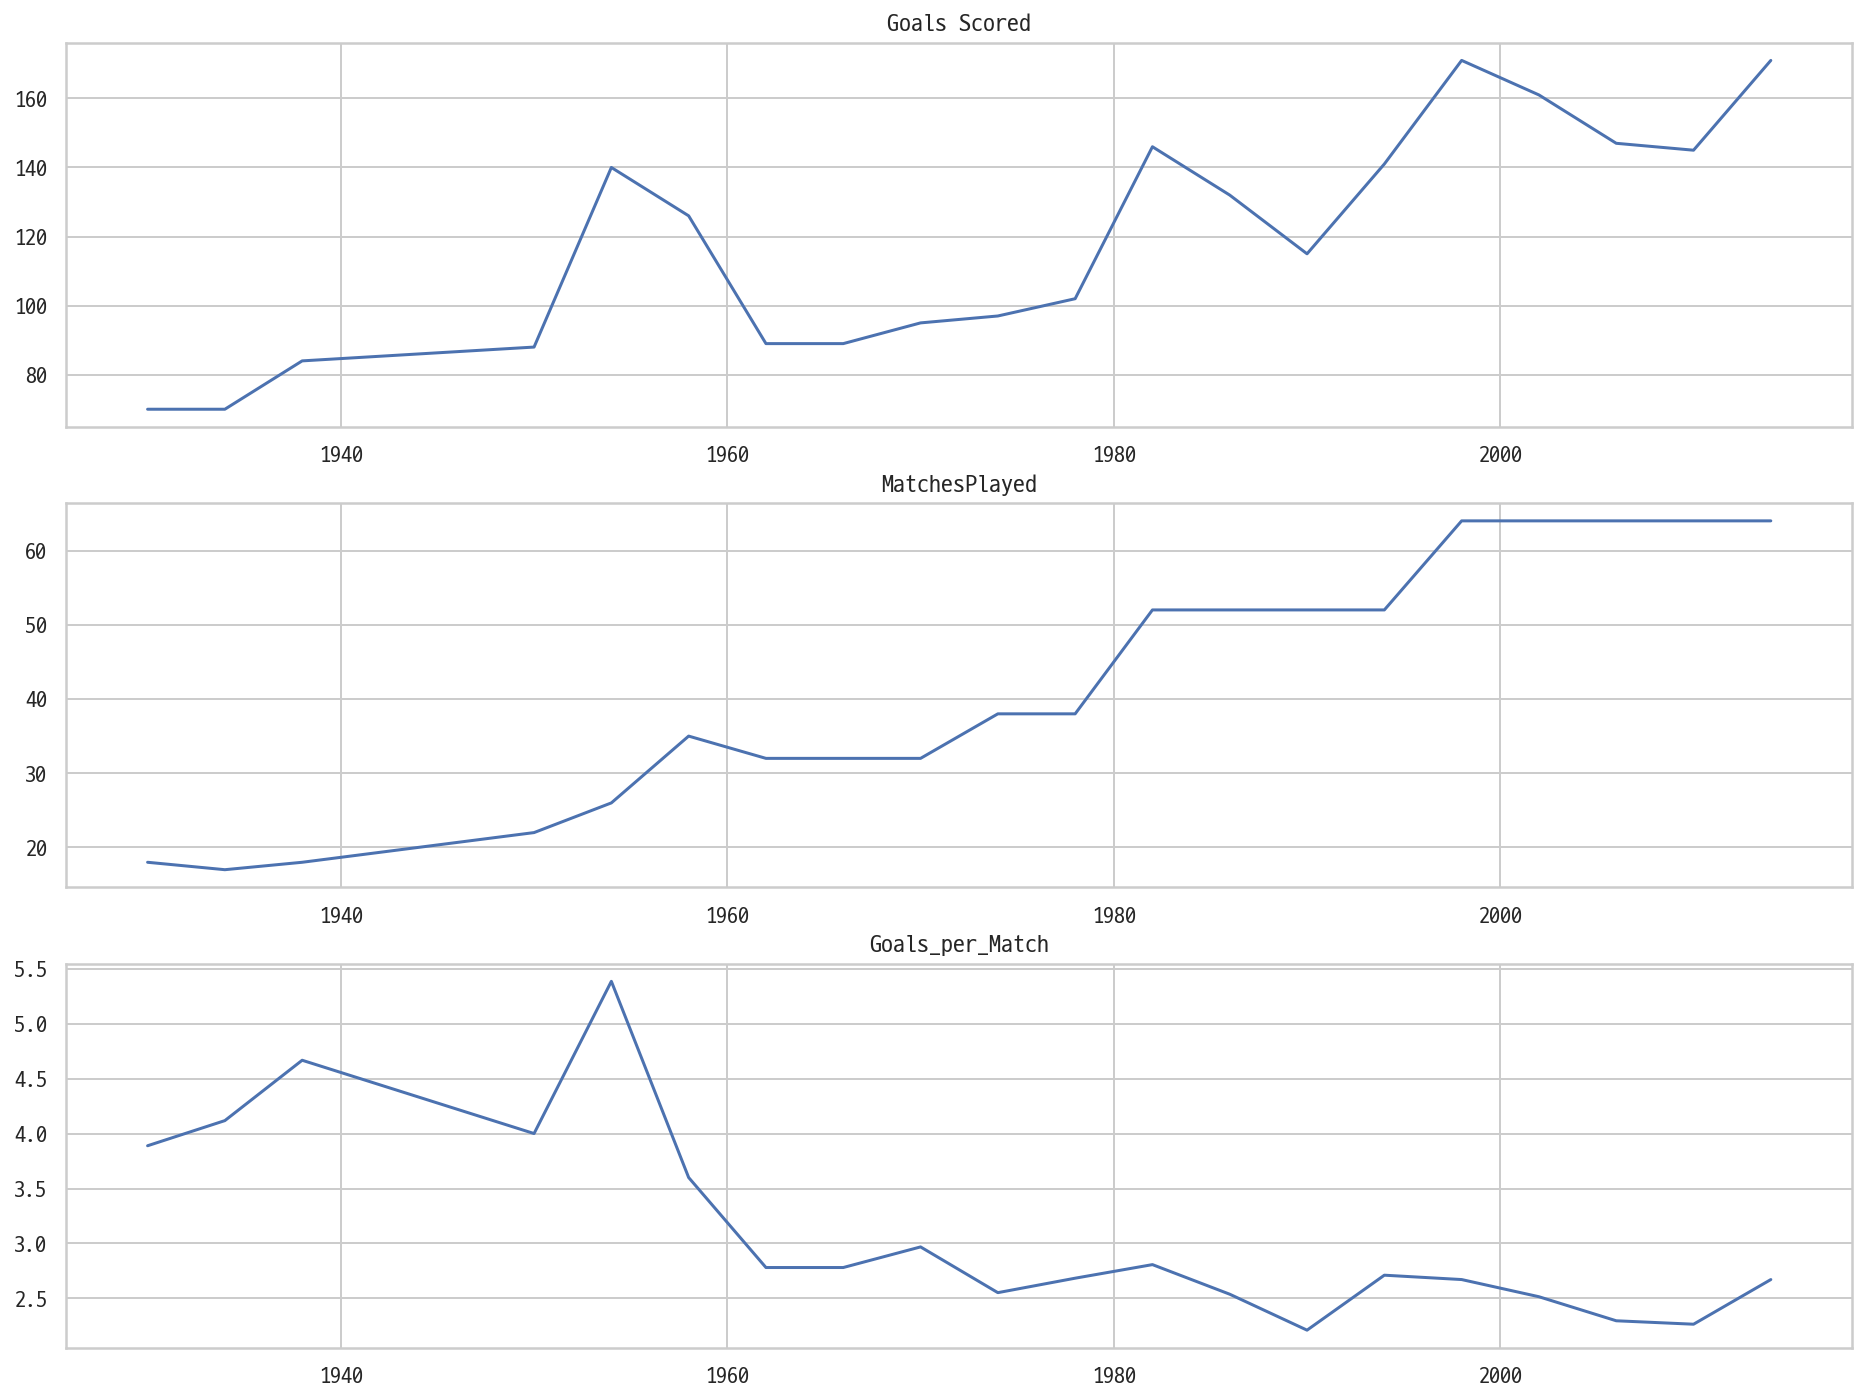

In [12]:
plt.figure(figsize=(16, 12))

plt.subplot(311)
plt.plot("Year", "GoalsScored", data=worldcup)
plt.title("Goals Scored")
plt.subplot(312)
plt.plot("Year", "MatchesPlayed", data=worldcup)
plt.title("MatchesPlayed")
plt.subplot(313)
plt.plot("Year", "Goals_per_Match", data=worldcup)
plt.title("Goals_per_Match")
plt.show()

- 나눠서 보니 경향성이 훨씬 명확하게 보이는군요.
- 경기 수가 늘어남에 따라 전체 득점 수도 꾸준히 늘어났지만, 각 경기 당 득점 수는 꾸준히 내려가고 있습니다. 
- 나라별 경기 진행이 초기보다 안정화되었다고 볼 수 있겠습니다.

---

# 2. 월드컵 매치 데이터

## 2-1. 데이터 분석 준비하기

### (1) Load Dataset

이번에는 월드컵 매치 데이터를 확인해보겠습니다.     
이번에는 `WorldCupMatches.csv` 데이터를 사용합니다. 역시 pandas로 데이터를 가져옵니다.

In [13]:
# read_csv
match = pd.read_csv("fifa-world-cup/WorldCupMatches.csv")

# shape 출력
print(match.shape)

match.head()

(4572, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 이번에는 이전 데이터보다 훨씬 다양한 데이터들이 있는 것 같습니다. 아마 연도별로 진행된 모든 매치들이 들어있기 때문일 것입니다.


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 경기가 진행된 연도 | 1930
Datetime | 경기 시작 시간 | 13 Jul 1930 - 15:00
Stage | 스테이지(조별리그, 16강, 8강 등) | Group 1
Stadium | 경기장 | Pocitos
City | 도시 | Montevideo
Home Team Name | 홈 팀 국가 이름 | France
Home Team Goals | 홈 팀 득점 수 | 4	
Away Team Goals | 원정 팀 득점 수 | 1
Away Team Name | 원정 팀 국가 이름 | Mexico
Win conditions | 승리 상황  | Italy win after extra time
Attendance | 관중 수 | 4444
Half-time Home Goals | 홈 팀 전반전 득점 수 | 3
Half-time Away Goals | 원정 팀 전반전 득점 수 | 0
Referee | 주심의 이름 | LOMBARDI Domingo (URU)	
Assistant 1 | 제 1 부심(선심)의 이름 | CRISTOPHE Henry (BEL)	
Assistant 2 | 제 2 부심(선심)의 이름 | REGO Gilberto (BRA)	
RoundID | 라운드의 고유 ID | 201
MatchID | 경기의 고유 ID | 1096
Home Team Initials | 홈 팀의 세 글자 이니셜 | FRA
Away Team Initials | 원정 팀의 세 글자 이니셜 | MEX

## 2-2. 꼭 필요한  데이터 전처리
- 데이터를 다루기 전에 꼭 확인하고 처리해야 할 것들이 있습니다. 바로 확인해보겠습니다.

### (1) 전체 데이터 확인

- 세부적으로 보기 이전에, 먼저 전체 데이터를 확인해보겠습니다.

In [14]:
# info 확인
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

- 총 4572개의 행과,  20개의 컬럼이 존재합니다. 하지만, Non-Null count는 852개 밖에 안되는군요. 결측치를 확인해 볼 필요가 있겠습니다.

### (2) 결측치 (빈 데이터)

- 결측치가 있다면 pandas에서 사용하는 대부분의 함수 또는 연산이 작동하지 않습니다. 따라서 결측치를 먼저 확인해주는 습관을 가지고 있으면 좋습니다.




- 결측치는 `isnull()` 함수로 확인해볼 수 있습니다.

In [15]:
match.isnull().head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- `isnull()` 함수를 그냥 사용하면 위와 같이 비어있지 않고 어떤 값이든 들어있다면 `False`, 값이 없어 비어있다면 `True`로 표시가 됩니다.
- 하지만, 이렇게는 여전히 한 번에 볼 수 없습니다. 따라서 `isnull()` 뒤에 `sum()` 함수를 추가로 붙여주어 결측치의 개수를 확인해보겠습니다.

In [16]:
match.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

- `sum()` 함수가 컬럼별로 (`axis=0`) 연산되었기 때문에 Series 형태로 보여지게 되었습니다. 
- 여기에 `sum()`을 한 번 더 사용하면 전체 데이터프레임의 결측치 총 개수를 확인할 수 있습니다.

In [17]:
match.isnull().sum().sum()

74402

- 그나저나, 결측치가 매우 많아보입니다. 또한 전부 3720개인 것으로 보아 무언가 패턴이 있는 것 같은데요!
- 확인해 보겠습니다.


- `sum()` 함수에 `axis=1` 인자를 넣어주면 각각의 행 기준으로 합산을 합니다. (즉, axis 1이 사라집니다 : axis 0은 행, axis 1은 열을 나타냅니다)

In [18]:
match.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
4567    20
4568    20
4569    20
4570    20
4571    20
Length: 4572, dtype: int64

- 어랏, 아랫부분의 행들에 `null`값이 20개씩 있군요.
- 전체 컬럼의 개수가 20개였으므로, 행별로 결측치가 20개인 데이터는 모든 컬럼이 전부 비어있는 행이라고 볼 수 있겠습니다. 
- 원래 결측치는 어떤 식으로 존재하냐에 따라 어떻게 처리할지 고민해보는 것이 좋지만, 이처럼 데이터가 아예 없는 경우에는 활용 자체를 할 수가 없기 때문에 필요가 없습니다.
- 따라서 이러한 행들은 지워주도록 하겠습니다.


- `null`값이 있는 행을 지우고 싶을 때에는 `dropna`를 활용하면 편리하게 지울 수 있습니다.

In [19]:
# dropna
match = match.dropna()
print(match.shape)
match.head()

(850, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 비어있는 값이 있는 행이 없어지고 850개의 행만 남았습니다.
- 다시 null값의 개수를 확인해보죠.

In [20]:
# isnull.sum()
match.isnull().sum().sum()

0

깔끔히 모두 지워졌군요!

### (3) 중복된 데이터

- 비어있는 데이터 다음에는 중복된 데이터도 확인해봐야겠죠. `duplicated()` 함수를 활용해 간단히 확인할 수 있습니다.



- 역시 뒤에 `sum()`을 붙여  개수를 확인해보겠습니다.

In [21]:
match.duplicated().sum()

15

- 15개의 중복 데이터가 있군요! `drop_duplicates()`를 활용해서 지워주겠습니다.

In [22]:
# drop_duplicates
match = match.drop_duplicates()

In [23]:
# 확인
match.duplicated().sum()

0

- 중복된 데이터까지 모두 지워졌습니다! 이제 본격적으로 시작해보도록 하겠습니다.

## 2-3. 더 해보면 좋을 전처리들
- 기본적인 처리 후 확인해보며 처리하면 좋을 것들에 대해  고민해보겠습니다.
- 데이터셋에 따라 꼭 필요하지는 않을 수도 있으나, 알고 있다면 도움이 될 수도 있습니다!

### (1) 숫자형 데이터 가볍게 만들기
- 먼저 숫자로 되어 있는 데이터를 확인해보겠습니다. float64라고 써있었던 컬럼들이요!

In [24]:
number_col = ["Year", "Home Team Goals", "Away Team Goals", "Attendance", "Half-time Home Goals", \
              "Half-time Away Goals", "RoundID", "MatchID"]

match[number_col].head()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,1930.0,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0
1,1930.0,3.0,0.0,18346.0,2.0,0.0,201.0,1090.0
2,1930.0,2.0,1.0,24059.0,2.0,0.0,201.0,1093.0
3,1930.0,3.0,1.0,2549.0,1.0,0.0,201.0,1098.0
4,1930.0,1.0,0.0,23409.0,0.0,0.0,201.0,1085.0


- 확인 결과 이 데이터들은 현재 모두 float, 즉 실수 자료형으로 저장되어 있으나, 사실 정수형 int 데이터여도 문제가 없는 데이터들입니다.
- 따라서 이 데이터들은 모두 int 정수형 데이터로 수정해주도록 하겠습니다. 
- 데이터셋이 커질수록, float 자료형은 메모리를 더 많이 차지하기 때문에 정수형이어도 문제가 없을 경우 정수형으로 저장해주는 것이 좋습니다.

In [25]:
match["Year"] = match["Year"].astype("int64")
match["Home Team Goals"] = match["Home Team Goals"].astype("int64")
match["Away Team Goals"] = match["Away Team Goals"].astype("int64")
match["Attendance"] = match["Attendance"].astype("int64")
match["Half-time Home Goals"] = match["Half-time Home Goals"].astype("int64")
match["Half-time Away Goals"] = match["Half-time Away Goals"].astype("int64")
match["RoundID"] = match["RoundID"].astype("int64")
match["MatchID"] = match["MatchID"].astype("int64")

In [26]:
match[number_col].head()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,1930,4,1,4444,3,0,201,1096
1,1930,3,0,18346,2,0,201,1090
2,1930,2,1,24059,2,0,201,1093
3,1930,3,1,2549,1,0,201,1098
4,1930,1,0,23409,0,0,201,1085


- 정수로 깔끔해졌군요.

### (2) 문자열 데이터 확인하기
- 그 다음에는 남은 문자열 데이터들을 확인해보겠습니다. `info()`에서는 object로 나타났었죠.
- 문자열 데이터는 어떤 데이터냐에 따라 매우 중요한 데이터일수도, 아닐 수도 있습니다. 따라서 데이터의 특성을 파악한 후 그에 맞게 처리해주는 것이 중요합니다.


- 전체 데이터에는 숫자형 데이터와 object 데이터만 있었으므로 간단한 리스트  컴프리헨션을 통해 `object_col`을 생성해주도록 하겠습니다.

In [27]:
object_col = [i for i in match.columns if i not in number_col]
object_col

['Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Away Team Name',
 'Win conditions',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'Home Team Initials',
 'Away Team Initials']

- 네,  알맞게 다 들어간 것으로 보입니다.


- 한 번 모두를 확인해보겠습니다. 

In [28]:
match[object_col].head()

,Datetime,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,Mexico,,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,Belgium,,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),USA,BEL
2,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,Brazil,,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),YUG,BRA
3,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,Peru,,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),ROU,PER
4,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,France,,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),ARG,FRA


- 한 눈에 들어오니 어떤 컬럼을 분석할 지 확인하기 쉽군요. 이 중 어떤 컬럼을 분석해보면 흥미로울 것 같나요?

## 2-4. Datetime 데이터 다뤄보기
- 위  컬럼 중 `Datetime` 컬럼을 한 번 다뤄보겠습니다. 
- 시간 데이터의 경우 pandas의 기본 내장 함수인 `to_datetime`으로 편리하게 변환할 수 있습니다.

#### (1) `Datetime` 컬럼은 시간 자료형으로 변환해주겠습니다.

In [29]:
match["Datetime"] =  pd.to_datetime(match["Datetime"])

- 위 코드를 거친 후 `dt.[time]` 을 활용하면 원하는 시간 단위의 컬럼을 생성할 수 있습니다.  (초 단위는 없으니 `second`는 생략하겠습니다.)

In [30]:
match["Datetime_year"] = match["Datetime"].dt.year
match["Datetime_month"] = match["Datetime"].dt.month
match["Datetime_date"] = match["Datetime"].dt.day
match["Datetime_hour"] = match["Datetime"].dt.hour
match["Datetime_minute"] = match["Datetime"].dt.minute
# match["Datetime_second"] = match["Datetime"].dt.second

- 또한, `dayofweek`를 활용해 요일을 가져올 수 있습니다.
- 각 숫자는 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 뜻합니다.

In [31]:
match["Datetime_day"] = match["Datetime"].dt.dayofweek
match[["Datetime_day", "Datetime_date"]].head()

,Datetime_day,Datetime_date
0,6,13
1,6,13
2,0,14
3,0,14
4,1,15


- 숫자를 사람이 알아보기 쉬운 문자열로 변환해주도록 하겠습니다.

In [32]:
match.loc[match["Datetime_day"] == 0, "Datetime_day_string"] = "Monday"
match.loc[match["Datetime_day"] == 1, "Datetime_day_string"] = "Tuesday"
match.loc[match["Datetime_day"] == 2, "Datetime_day_string"] = "Wednesday"
match.loc[match["Datetime_day"] == 3, "Datetime_day_string"] = "Thursday"
match.loc[match["Datetime_day"] == 4, "Datetime_day_string"] = "Friday"
match.loc[match["Datetime_day"] == 5, "Datetime_day_string"] = "Saturday"
match.loc[match["Datetime_day"] == 6, "Datetime_day_string"] = "Sunday"

In [33]:
match[["Datetime",  "Datetime_year", "Datetime_month", "Datetime_date", "Datetime_hour", 
       "Datetime_minute", "Datetime_day", "Datetime_day_string"]]

,Datetime,Datetime_year,Datetime_month,Datetime_date,Datetime_hour,Datetime_minute,Datetime_day,Datetime_day_string
0,1930-07-13 15:00:00,1930,7,13,15,0,6,Sunday
1,1930-07-13 15:00:00,1930,7,13,15,0,6,Sunday
2,1930-07-14 12:45:00,1930,7,14,12,45,0,Monday
3,1930-07-14 14:50:00,1930,7,14,14,50,0,Monday
4,1930-07-15 16:00:00,1930,7,15,16,0,1,Tuesday
...,...,...,...,...,...,...,...,...
831,2014-07-05 13:00:00,2014,7,5,13,0,5,Saturday
832,2014-06-29 13:00:00,2014,6,29,13,0,6,Sunday
833,2014-06-29 17:00:00,2014,6,29,17,0,6,Sunday
834,2014-07-01 13:00:00,2014,7,1,13,0,1,Tuesday


- 모두 알맞게 생성된 것으로 보입니다. 

#### (2) Datetime의 추이를 그래프로 확인해보겠습니다.
이제 `seaborn` 시각화 툴을 통해 날짜/시간별 추이를 시각화해보겠습니다.    
seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지로, 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리, 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.     

- https://matplotlib.org/tutorials/introductory/sample_plots.html
- http://seaborn.pydata.org/

`sns.countplot`으로 각 데이터의 개수를 시각화해보겠습니다.

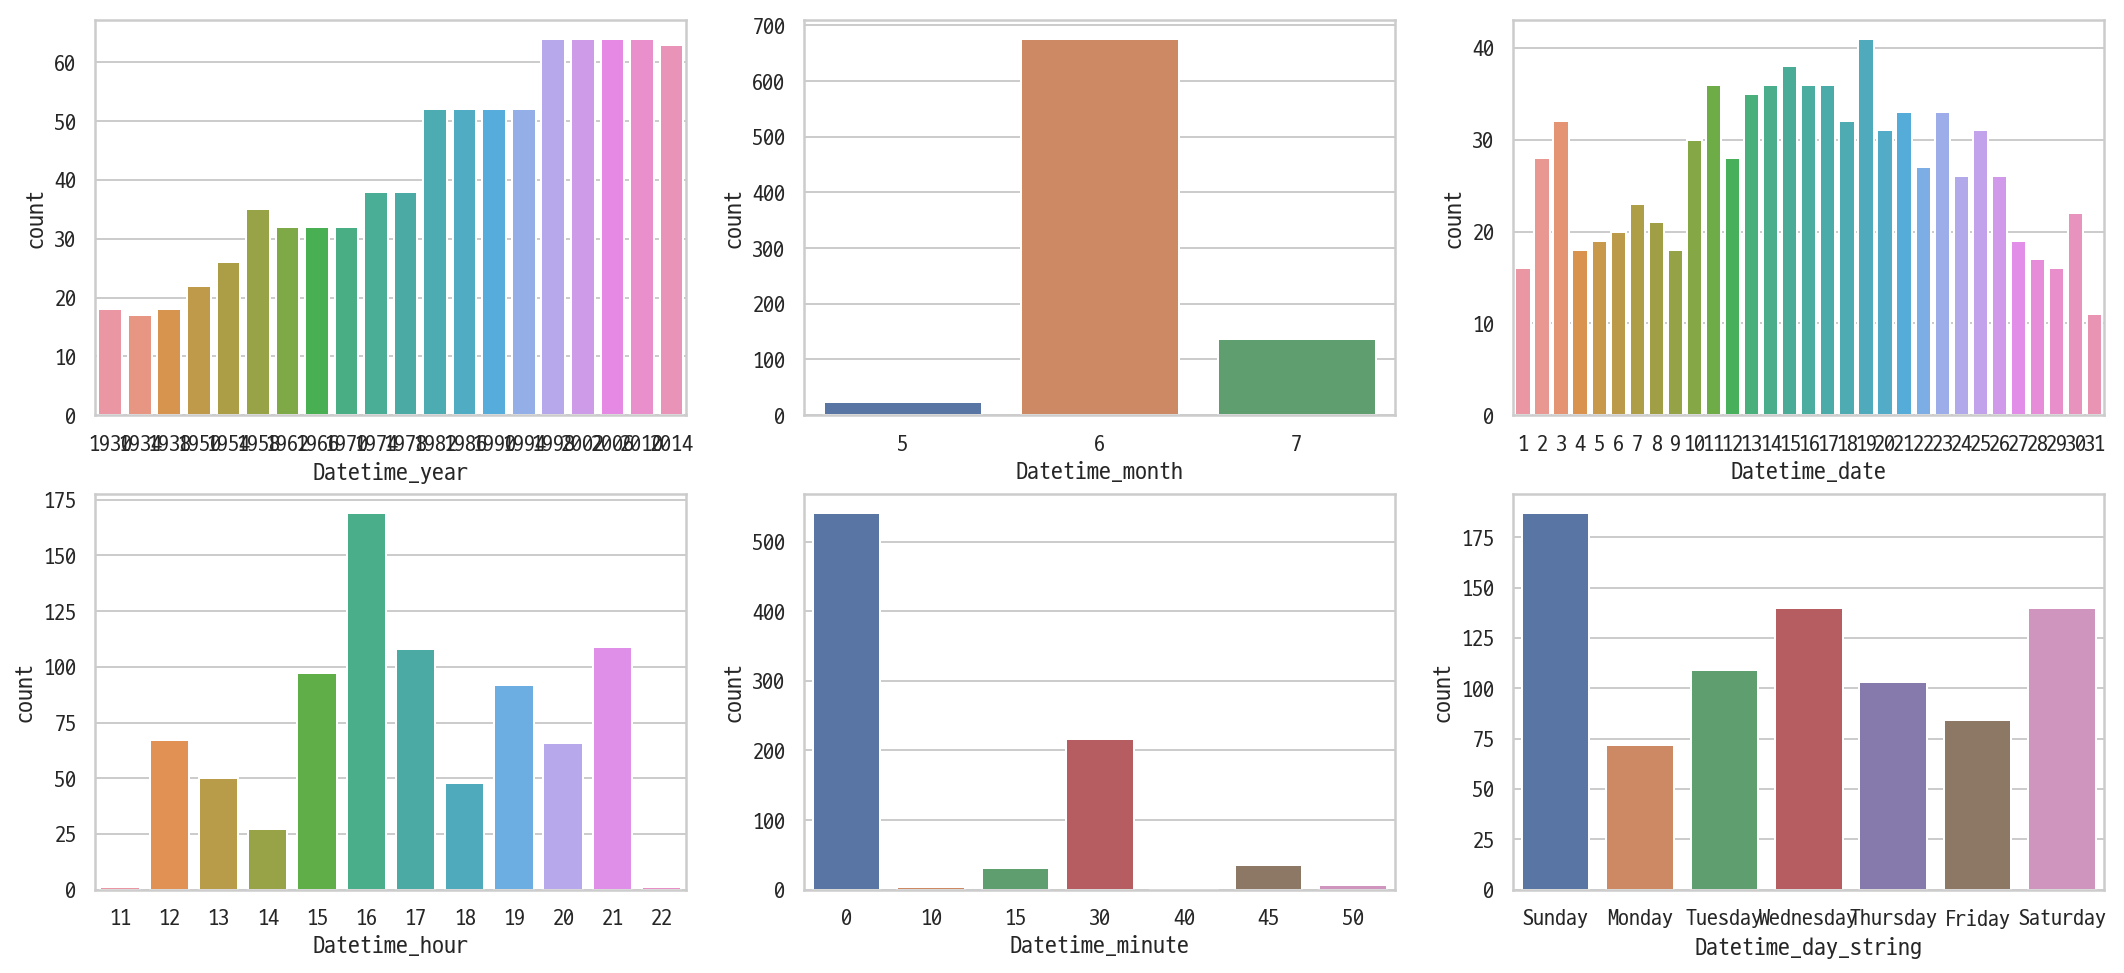

In [34]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.countplot(data=match, x="Datetime_year", ax=ax1)
sns.countplot(data=match, x="Datetime_month", ax=ax2)
sns.countplot(data=match, x="Datetime_date", ax=ax3)
sns.countplot(data=match, x="Datetime_hour", ax=ax4)
sns.countplot(data=match, x="Datetime_minute", ax=ax5)
sns.countplot(data=match, x="Datetime_day_string", ax=ax6)
plt.show()

- 각각의 추이를 보면, 월드컵의 개최 경향성을 생각해볼 수 있습니다.

## 2-5. 나라 이름 전처리하기
- 뒤에 다양한 분석을 해보기 전에 나라 이름을 먼저 확인해보고 필요한 경우 처리를 해주도록 하겠습니다.

In [35]:
# unique
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

몇 가지 처리해주어야 할 나라이름들이 보입니다. 다음 나라 이름들을 `replace` 함수로  변환해주도록 하겠습니다.
- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

In [36]:
match = match.replace('Germany FR', 'Germany')
match = match.replace("C�te d'Ivoire", 'Côte d’Ivoire')
match = match.replace('rn">Bosnia and Herzegovina', 'Bosnia and Herzegovina')
match = match.replace('rn">Serbia and Montenegro', 'Serbia and Montenegro')
match = match.replace('rn">Trinidad and Tobago', 'Trinidad and Tobago')
match = match.replace('rn">United Arab Emirates', 'United Arab Emirates')
match = match.replace('rn">Republic of Ireland', 'Republic of Ireland')
match = match.replace('Soviet Union', 'Russia')

잘 바뀌었는지 확인해볼까요?

In [37]:
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador',
       'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola',
       'Czech Republic', 'Togo', 'Iran', 'Côte d’Ivoire', 'Ghana',
       'Ukraine', 'Serbia', 'New Zealand', 'Slovak

모두 잘 처리되었군요. 그렇다면 Away Team Name도 확인해보겠습니다.

In [38]:
match["Away Team Name"].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Uruguay',
       'Wales', 'Northern Ireland', 'Russia', 'Colombia', 'Bulgaria',
       'Korea DPR', 'Portugal', 'Israel', 'Morocco', 'El Salvador',
       'Australia', 'Haiti', 'German DR', 'Zaire', 'IR Iran', 'Tunisia',
       'Iran', 'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Greece',
       'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', 'Côte d’Ivoire',
       'Czech Republic', 'Ghana', 'Togo', 'Ukraine',

네, 똑같이 잘 처리되었습니다!

그렇다면 Home Team에 있는 나라 이름 리스트와 Away Team의 리스트는 같을까요?

In [39]:
# Home Team Name - Away Team Name
set(match["Home Team Name"].unique()) - set(match["Away Team Name"].unique())

set()

In [40]:
# Away Team Name - Home Team Name
set(match["Away Team Name"].unique()) - set(match["Home Team Name"].unique())

{'Dutch East Indies', 'Egypt', 'El Salvador', 'Israel', 'Kuwait'}

Away에는 있지만 Home에는 없는 나라가 총 다섯 개국 있군요. 추후 두 데이터를 함께 다룰 때 주의해야 할 것으로 보입니다.

## 2-6. 국가별 득점 수 구하기
- 이번에는 각  국가별 득점 수를 구해보도록 하겠습니다. 어떤 나라가 많은 득점을 했을까요?

#### (1) Home Team과 Away Team 별 데이터 추출하기

- `groupby`로 우리가 원하는 데이터를 추출해낼 수 있습니다. 
- 각 나라가 홈 팀으로 얻은 득점과, 원정팀으로 얻은 득점을 합쳐 구해보겠습니다.

In [41]:
# groupby
match.groupby(['Home Team Name'])

- `groupby`만을 사용하면 결과는 함수가 반환됩니다. 
- 여기서 우리가 합하고 싶은 `Home Team Goals` 컬럼을 추출하고, sum()으로 값을 확인해보도록 하겠습니다.

In [42]:
# sort_values
home = match.groupby(['Home Team Name'])['Home Team Goals'].sum().sort_values(ascending=False)
away = match.groupby(['Away Team Name'])['Away Team Goals'].sum().sort_values(ascending=False)

In [43]:
home.head()

Home Team Name
Brazil       176
Germany      163
Argentina    109
Italy         99
Hungary       73
Name: Home Team Goals, dtype: int64

In [44]:
away.head()

Away Team Name
Germany        59
Brazil         45
Spain          42
France         40
Netherlands    37
Name: Away Team Goals, dtype: int64

- 두 가지 모두 잘 생성되었군요.


- 이제 `concat` 함수를 활용해서 두 Series 데이터를 합쳐보겠습니다. 열을 늘리고 싶으므로, `axis=1`을 추가해주도록 하겠습니다.

In [45]:
# concat
goal_per_country = pd.concat([home, away], axis=1, sort=True)
goal_per_country

,Home Team Goals,Away Team Goals
Algeria,5.0,7
Angola,0.0,1
Argentina,109.0,22
Australia,7.0,4
Austria,31.0,12
...,...,...
United Arab Emirates,0.0,2
Uruguay,62.0,18
Wales,2.0,2
Yugoslavia,42.0,18


- 이 때, 아까 확인했던 Home Team 리스트와 Away Team 리스트의차이로 인해 NaN (Not a number) 값이 생길 것입니다. 

In [46]:
goal_per_country.isnull().sum()

Home Team Goals    5
Away Team Goals    0
dtype: int64

- Home Team에 다섯 개국이 없기 때문에 5개의 값이 비어있습니다. 이들을 0으로 채워주도록 하겠습니다.

In [47]:
# fillna, astype
goal_per_country = goal_per_country.fillna(0).astype('int64')
goal_per_country.isnull().sum()

Home Team Goals    0
Away Team Goals    0
dtype: int64

잘 채워졌군요.


- 이제 두 값을 더해서 전체 골을 만들어보고, 전체 데이터를 `Goals`로 정렬해주도록 하겠습니다.

In [48]:
# Home Team Goals + Away Team Goals
# sort_values
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country = goal_per_country.sort_values(by="Goals", ascending=False)
goal_per_country

,Home Team Goals,Away Team Goals,Goals
Germany,163,59,222
Brazil,176,45,221
Argentina,109,22,131
Italy,99,29,128
France,66,40,106
...,...,...,...
Canada,0,0,0
Trinidad and Tobago,0,0,0
China PR,0,0,0
Dutch East Indies,0,0,0


#### (2) 상위 10개국 득점 수 시각화해보기

- 상위 10개국만 그래프로 시각화 해보겠습니다.
- 표에서 나라 이름이 index로 사용되었으므로, x는 `top_10.index`로 넣어주면 됩니다.

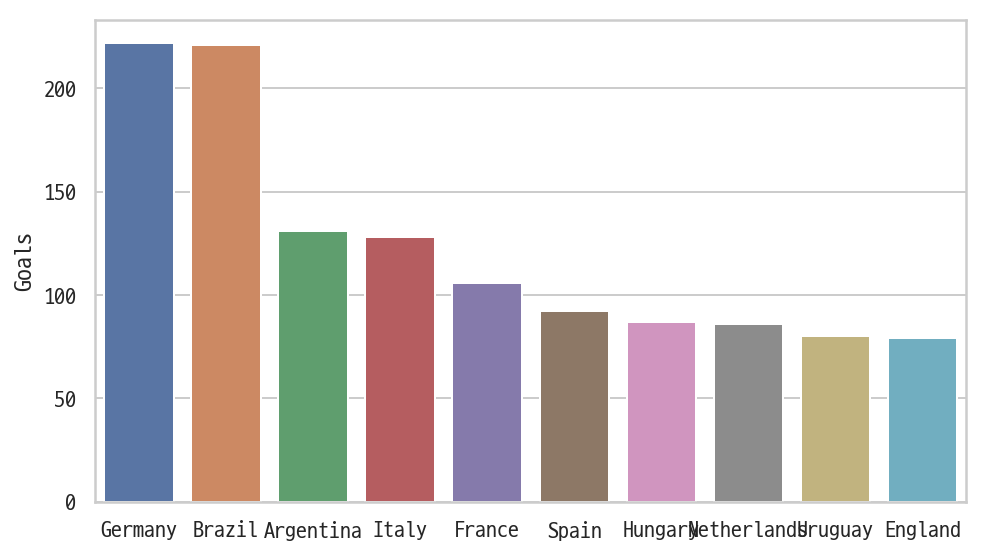

In [49]:
top_10 = goal_per_country[:10]

plt.figure(figsize=(7, 4))
sns.barplot(data=top_10, x=top_10.index, y="Goals")
plt.tight_layout()
plt.show()

## 2-7. 4강 이상 성적 집계하기
- 전체 월드컵 국가 중 4강 이상을 해 본 국가는 어떤 나라가 많을까요? 좀 더 세부적으로 살펴보도록 하겠습니다.

#### (1) 1, 2, 3, 4위 국가 변수로 저장하기
- 1~4위 국가를 각각 변수에 저장해주도록 하겠습니다.

In [50]:
winner = worldcup["Winner"]
runners_up = worldcup["Runners-Up"]
third = worldcup["Third"]
fourth = worldcup["Fourth"]

- 그 후, 각 국가가 1~4위를 해 본 횟수를 count 변수에 저장합니다.

In [51]:
winner_count = pd.Series(winner.value_counts())
runners_up_count = pd.Series(runners_up.value_counts())
third_count = pd.Series(third.value_counts())
fourth_count = pd.Series(fourth.value_counts())

In [52]:
winner_count

Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

- 나라별 횟수가 잘 저장되었군요.



- 위 데이터들을 `ranks`라는 하나의 데이터프레임으로 합쳐줍니다.

In [53]:
ranks = pd.DataFrame({
  "Winner" : winner_count,
  "Runners_Up" : runners_up_count,
  "Third" : third_count,
  "Fourth" : fourth_count
})

ranks

,Winner,Runners_Up,Third,Fourth
Argentina,2.0,3.0,NaN,NaN
Austria,NaN,NaN,1.0,1.0
Belgium,NaN,NaN,NaN,1.0
Brazil,5.0,2.0,2.0,2.0
Bulgaria,NaN,NaN,NaN,1.0
Chile,NaN,NaN,1.0,NaN
Croatia,NaN,NaN,1.0,NaN
Czechoslovakia,NaN,2.0,NaN,NaN
England,1.0,NaN,NaN,1.0
France,1.0,1.0,2.0,1.0


- NaN값은 각 국가가 해당 성적을 내 본 적이 없기 때문에 나타납니다. 
- NaN값을 0으로 채워주겠습니다.

In [54]:
# fillna, astype
ranks = ranks.fillna(0).astype('int64')
ranks

,Winner,Runners_Up,Third,Fourth
Argentina,2,3,0,0
Austria,0,0,1,1
Belgium,0,0,0,1
Brazil,5,2,2,2
Bulgaria,0,0,0,1
Chile,0,0,1,0
Croatia,0,0,1,0
Czechoslovakia,0,2,0,0
England,1,0,0,1
France,1,1,2,1


- 데이터프레임을 `winner`, `runners_up`, `third`, `fourth` 순서대로 정렬해주겠습니다.

In [55]:
# sort_values
ranks = ranks.sort_values(['Winner', 'Runners_Up', 'Third', 'Fourth'], ascending=False)
ranks

,Winner,Runners_Up,Third,Fourth
Brazil,5,2,2,2
Italy,4,2,1,1
Germany FR,3,3,1,1
Argentina,2,3,0,0
Uruguay,2,0,0,3
Germany,1,1,3,0
France,1,1,2,1
England,1,0,0,1
Spain,1,0,0,1
Netherlands,0,3,1,1


- 한국은 4위를 한 번 해봤군요!